## Hälsostudie DEL 1

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("health_study_dataset.csv")
df.head(3)

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0


Här har jag räknat ut medel, median, högsta och minsta värdet på datan från kolumnerna ålder, vikt, längd, blodtryck och kolesterol.

In [39]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]

summary = pd.DataFrame({
    'mean': df[columns].mean(),
    'median': df[columns].median(),
    'max': df[columns].max(),
    'min': df[columns].min()
})

print(summary)

                   mean  median     max    min
age           49.426250   50.00   90.00   18.0
weight        73.413000   73.20  114.40   33.7
height       171.849250  171.35  200.40  144.4
systolic_bp  149.178625  149.40  185.90  106.8
cholesterol    4.929150    4.97    7.88    2.5


# Histogram - blodtrycksnivå

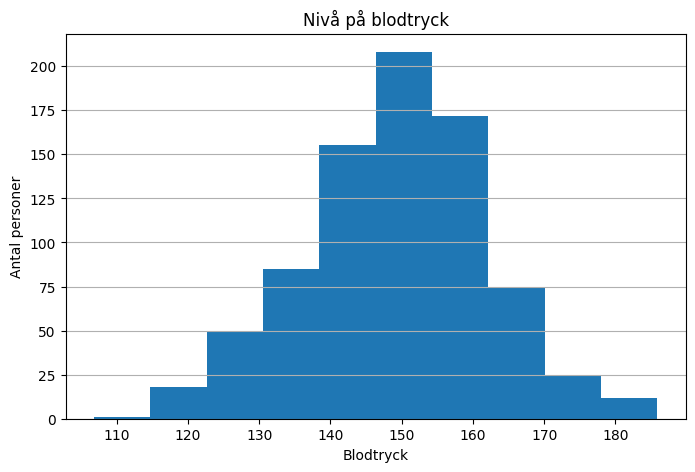

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df["systolic_bp"], bins=10)
ax.set_title("Nivå på blodtryck")
ax.set_xlabel("Blodtryck")
ax.set_ylabel("Antal personer")
ax.grid(True, axis="y")


# Boxplot - Längd per kön

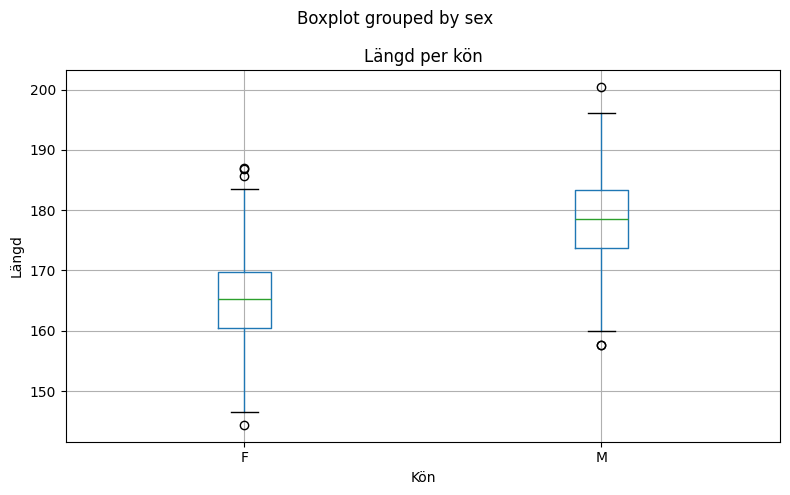

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column="height", by="sex", ax=ax)
ax.set_title("Längd per kön")
ax.set_xlabel("Kön")
ax.set_ylabel("Längd")
plt.tight_layout()

# Stapeldiagram - rökare vs icke rökare

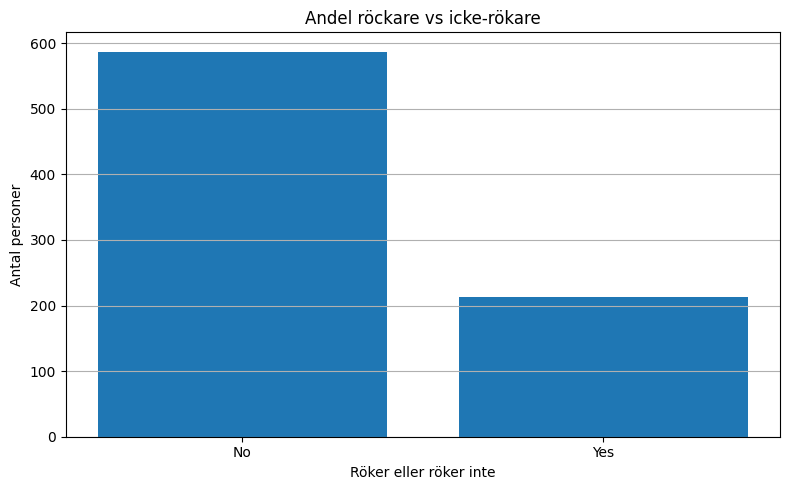

In [42]:
fix, ax = plt.subplots(figsize=(8, 5))
counts = df["smoker"].value_counts()

ax.bar(counts.index, counts.values)
ax.set_title("Andel röckare vs icke-rökare")
ax.set_xlabel("Röker eller röker inte")
ax.set_ylabel("Antal personer")
ax.grid(True, axis="y")
plt.tight_layout()
plt.show()

Uträkning på andel som har sjukdomen och andel som inte har sjukdomen

In [43]:
with_disease = df["disease"].sum()
amount_people = len(df["disease"])
part = with_disease / amount_people

print("Andel med sjukdom:", round(part, 2))


Andel med sjukdom: 0.06


In [44]:
np.random.seed(42)

simulated = np.random.choice(
    [0, 1],                
    size=1000,             
    p=[1 - part, part]   
)

numwdisease = np.sum(simulated)
numpeople = len(simulated)
numsimulated = numwdisease / numpeople

print("Andelen som är sjuka i simuleringen är:", round(numsimulated, 3))


Andelen som är sjuka i simuleringen är: 0.056


Andelen som har sjukdomen är 6%, och i den simulerade versionen är det 5.6% som har sjukdomen.

# Konfidensintervall
Normalapproximation

In [45]:
np.random.seed(42)
pop = np.random.normal(loc=50, scale=10, size=800)
true_mean = float(np.mean(pop))
true_mean             

49.92102208317195

In [46]:
from math import sqrt
bp = df["systolic_bp"]

def ci_mean_normal(bp, confidence=0.95):
    
    bp = np.asarray(bp, dtype=float)
    mean_bp = float(np.mean(bp))
    s = float(np.std(bp, ddof=1))
    n = len(bp)

    z_critical = 1.96
    half_width = z_critical * s / sqrt(n)
    lo, hi = mean_bp - half_width, mean_bp + half_width
    return lo, hi, mean_bp, s, n

lo, hi, mean_bp, s, n = ci_mean_normal(bp)
(lo, hi), mean_bp, s, n, true_mean

((148.29209036025347, 150.06515963974655),
 149.178625,
 12.793360316766597,
 800,
 49.92102208317195)

Lägsta värdet i intervallet: 148.3

Högsta värdet i intervallet: 150

Medelvärdet: 149.2

Standardavvikelse: 12.8

Antal personer: 800st

Sanna medelvärdet: 49.9

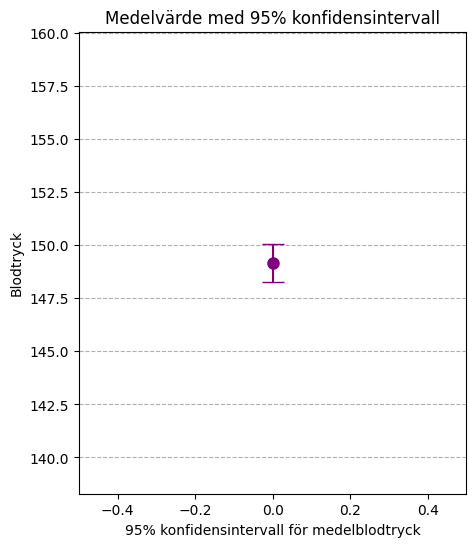

In [47]:
fig, ax = plt.subplots(figsize=(5, 6))
ax.errorbar([0], [mean_bp], yerr=[[mean_bp - lo], [hi - mean_bp]], fmt="o", capsize=8, color="purple", markersize=8)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(lo - 10, hi + 10)
ax.set_title("Medelvärde med 95% konfidensintervall")
ax.set_ylabel("Blodtryck")
ax.set_xlabel("95% konfidensintervall för medelblodtryck")
ax.grid(True, axis="y", linestyle='--')
plt.show()

# Hypotesprövning
T-test-funktion

In [48]:
from scipy import stats

smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
nonsmokers = df[df["smoker"] == "No"]["systolic_bp"]

t_stat, p_value = stats.ttest_ind(smokers, nonsmokers, equal_var=False)

print("t =", t_stat)
print("p =", p_value)


t = 0.4503433193393224
p = 0.6527338743398998


# Hypotesprövning: Har rökare högre medelblodtryck än icke-rökare?

Jag genomförde ett t-test för att jämföra det genomsnittliga blodtrycket mellan rökare och de som inte röker, utifrån datan till hälsostudien. Jag använde standard-signifikantsnivån 0.05.


**Resultat:**
Eftersom p-värdet (0.652) är större än 0.05 finns det ingen statistiskt signifikant skillnad på blodtrycket hos rökare vs icke-rökare. Vi måste därför behålla nollhypotesen. I denna studie finns det inget som säger att rökare har ett högre medelblodtryck än icke-rökare.
